# Деревья Решений

* этот урок использует материалы курса [mlcourse.ai](https://github.com/Yorko/mlcourse.ai)

![image](https://camo.githubusercontent.com/ff089b22613d7037554cf72d952a0cf12acba449/68747470733a2f2f686162726173746f726167652e6f72672f66696c65732f3430312f3863642f6265612f34303138636462656137613634333036626539346564373834666365346130362e706e67)

# Как строить Деревья?

Энтропия
Энтропия Шеннона определяется для системы с $N$ возможными состояниями следующим образом:

$$\Large S = -\sum_{i=1}^{N}p_ilog_2p_i,$$
где  $p_i$ – вероятности нахождения системы в $i$-ом состоянии. Это очень важное понятие, используемое в физике, теории информации и других областях. Опуская предпосылки введения (комбинаторные и теоретико-информационные) этого понятия, отметим, что, интуитивно, энтропия соответствует степени хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот. Это поможет там формализовать "эффективное разделение выборки", про которое мы говорили в контексте игры "20 вопросов".

## Пример

Для иллюстрации того, как энтропия поможет определить хорошие признаки для построения дерева, приведем тот же игрушечный пример, что в статье "Энтропия и деревья принятия решений". Будем предсказывать цвет шарика по его координате. Конечно, ничего общего с жизнью это не имеет, но позволяет показать, как энтропия используется для построения дерева решений. 

![im3](https://camo.githubusercontent.com/5f7d78e54b74752a8a895ac0e050983d25f66d7b/68747470733a2f2f686162726173746f726167652e6f72672f66696c65732f6339362f3830612f6134622f63393638306161346261626334306634626263386233353935653230333937392e706e67)

Здесь 9 синих шариков и 11 желтых. Если мы наудачу вытащили шарик, то он с вероятностью  $p_1=\frac{9}{20}$ будет синим и с вероятностью  $p_2=\frac{11}{20}$ – желтым. Значит, энтропия состояния  $S_0 = -\frac{9}{20}log_2{\frac{9}{20}}-\frac{11}{20}log_2{\frac{11}{20}} \approx 1$. Само это значение пока ни о чем нам не говорит. Теперь посмотрим, как изменится энтропия, если разбить шарики на две группы – с координатой меньше либо равной 12 и больше 12. 

![im2](https://camo.githubusercontent.com/95ce7f71342648975df2ea10556cbbf3677cdd84/68747470733a2f2f686162726173746f726167652e6f72672f66696c65732f3138362f3434342f6138622f31383634343461386264306534353163383332346361383532396638643466342e706e67)

В левой группе оказалось 13 шаров, из которых 8 синих и 5 желтых. Энтропия этой группы равна $S_1 = -\frac{5}{13}log_2{\frac{5}{13}}-\frac{8}{13}log_2{\frac{8}{13}} \approx 0.96$. В правой группе оказалось 7 шаров, из которых 1 синий и 6 желтых. Энтропия правой группы равна $S_2 = -\frac{1}{7}log_2{\frac{1}{7}}-\frac{6}{7}log_2{\frac{6}{7}} \approx 0.6$. Как видим, энтропия уменьшилась в обеих группах по сравнению с начальным состоянием, хоть в левой и не сильно. Поскольку энтропия – по сути степень хаоса (или неопределенности) в системе, уменьшение энтропии называют приростом информации. Формально прирост информации (information gain, IG) при разбиении выборки по признаку $Q$ (в нашем примере это признак "$x \leq 12$") определяется как $$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{|N_i|}{N}S_i,$$ где $q$ – число групп после разбиения, $N_i$ – число элементов выборки, у которых признак $Q$ имеет $i$-ое значение. В нашем случае после разделения получилось две группы ($q = 2$) – одна из 13 элементов ($N_1 = 13$), вторая – из 7 ($N_2 = 7$). Прирост информации получился $$\Large IG("x \leq 12") = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$ Получается, разделив шарики на две группы по признаку "координата меньше либо равна 12", мы уже получили более упорядоченную систему, чем в начале. Продолжим деление шариков на группы до тех пор, пока в каждой группе шарики не будут одного цвета.

![im](https://camo.githubusercontent.com/832d8089b1b41179a3b8e579c0661c4c601aa743/68747470733a2f2f686162726173746f726167652e6f72672f66696c65732f6461652f6138382f3262302f64616561383832623061386534656634623233333235633838663033353361312e706e67)

Для правой группы потребовалось всего одно дополнительное разбиение по признаку "координата меньше либо равна 18", для левой – еще три. Очевидно, энтропия группы с шариками одного цвета равна 0 ($log_2{1} = 0$), что соответствует представлению, что группа шариков одного цвета – упорядоченная. В итоге мы построили дерево решений, предсказывающее цвет шарика по его координате. Отметим, что такое дерево решений может плохо работать для новых объектов (определения цвета новых шариков), поскольку оно идеально подстроилось под обучающую выборку (изначальные 20 шариков). Для классификации новых шариков лучше подойдет дерево с меньшим числом "вопросов", или разделений, пусть даже оно и не идеально разбивает по цветам обучающую выборку. Эту проблему, переобучение, мы еще рассмотрим далее.



# Свойства деревьев

- хорошо работают для классификации, но могут и для регрессии (среднее по бину)
- на каждом шаге работаю только на одной фиче - их decision boundaries вертикальны/горизонтальны, 
  - они сильно зависят от качаства фичей и инжиниринга
  - не нужно скейлинга
- прекрасно работают с нелинейными фичами
- **легко переобучаются**

# Пример

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import make_scorer, median_absolute_error, mean_absolute_error

import pandas as pd

In [2]:
path = 'https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv'
df = pd.read_csv(path)
df.head(3)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,10234,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Queens
1,10524,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Forest Hills,Queens
2,5465,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Astoria,Queens


In [3]:
y = df['rent']
X = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee']]

In [4]:
# ?train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=2019)

/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
pd.np.random.seed(2019)

In [7]:
model = DecisionTreeRegressor(max_depth=10)

In [8]:
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
# model.score(X_train, y_train)

In [10]:
y_pred = model.predict(X_train)

In [13]:
mean_absolute_error(y_train, y_pred)

82.00432295823357

## Test scores

In [14]:
y_pred2 = model.predict(X_test)

In [15]:
mean_absolute_error(y_test, y_pred2)

315.3986251402918

Какой огромный разлет!  >> оверфитинг.


# Интерпретация

In [16]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [20]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

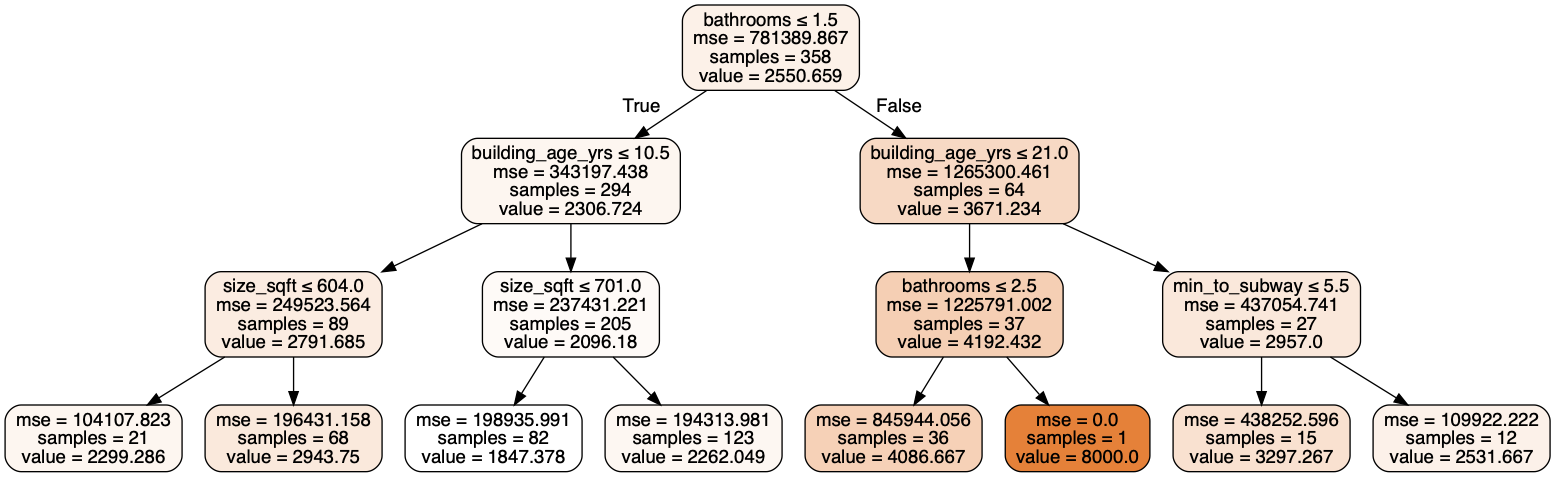

In [21]:
dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())